<a href="https://colab.research.google.com/github/KwonDoRyoung/AdvancedBasicEducationProgram/blob/main/abep08_appendix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch # Deep learning 패키지 (선형, 기계학습...)
import torch.nn as nn # Neural Network 모델을 생성하기 .nn
# 
class SLP(nn.Module): 
  # 상속을 통해서 역전파를 자동 계산 & 데이터를 입력, 출력
  def __init__(self,):
    super(SLP, self).__init__() # 상속하게 되면 무조건 넣어줘야됨
    # class 가 선언되면 바로 실행되는 부분
    # 입력되는 데이터가 10개의 정보를 가지고 있다. 
    # x = [[x1, ..., x10], [x1, ..., x10], [x1, ..., x10],...,[x1, ..., x10]] ; nx10
    # W = [w1, ..., w10]^T ; 10x1
    # x @ W <- @ 행렬곱 연산자 ; 1x1
    # Weight <- 10x1
    self.layer = nn.Linear(10, 1, bias=False) # W 가 포함되어있음
    self.activation = nn.Sigmoid() # 선언
  
  def forward(self, inputs): # 정방향 
    outputs = self.layer(inputs)  # x @ W 실행
    # print(f"forward: {outputs}")
    outputs = self.activation(outputs)
    # print(f"act: {outputs}")
    return outputs

In [ ]:
m = SLP() # ?? 

x = torch.ones([1, 10]) # data batch size = 1
o = m(x) # m(SLP class 를 선언받은) forward 함수를 호출함.
print(f"single layer perceptron output: {o.size()}")

single layer perceptron output: torch.Size([1, 1])


In [ ]:
# x = torch.rand([1, 10]) # 1개의 데이터를 가지고 한거에요.
# 전체 데이터가 100개 dataset
x = torch.rand([100, 10]) # 가정 rand 데이터를 만든거에요.
print(x.size())

# x : 100x10, w: 10x1 -> 행렬 연산 100x1 x@w
o = m(x) # 위에서 선언되어있음.
print(f"데이터셋 100개: {o.size()}")
# 입력 데이터에 사이즈에서 맨앞의 숫자는 Batch 크기 
# (= 입력되는 데이터의 개수)다.
#  사이즈에서 2번째가 의미하는 것은 데이터의 정보(Feature 특징)의 개수
# 총 데이터 개수는 10, 데이터의 정보개수는 3
# 학생1: 키, 몸무게, 성별
# 학생2
# 학생3
# ...
# 학생10
# 총 데이터 x 특징정보

# mnist 총 데이터 x (chanel x h x w)
# 3d image -> 1d vector flatten ???

torch.Size([100, 10])
데이터셋 100개: torch.Size([100, 1])


In [ ]:
import torch
import torch.nn as nn

# 데이터의 정보개수가 28x28=784
# 총 데이터가 6만개
class MLP(nn.Module): 
  def __init__(self,):
    super(MLP, self).__init__()
    # 1st layer 선언
    self.layer1 = nn.Linear(784, 100, bias=False) # 100 이라는 숫자를 바꾸면서
    self.activation1 = nn.Sigmoid() # ReLU
    # 2nd layer 선언
    self.layer2 = nn.Linear(100, 10, bias=False)
    self.activation2 = nn.Sigmoid()
    # 3rd layer 선언
    self.layer3 = nn.Linear(10, 1, bias=False)
    self.activation3 = nn.Sigmoid()
  
  def forward(self, inputs):
    # 1st layer 입력
    outputs = self.layer1(inputs)
    outputs = self.activation1(outputs)
    print(f"layer1: {outputs.size()}")
    # 2nd layer 입력
    outputs = self.layer2(outputs)
    outputs = self.activation2(outputs)
    # 3rd layer 입력
    outputs = self.layer3(outputs)
    outputs = self.activation3(outputs)
    return outputs

In [ ]:
model2 = MLP()
x0 = torch.rand([1, 784])
o = model2(x0)

layer1: torch.Size([1, 100])


In [ ]:
# 데이터를 호출.
# 1단계: pytorch 제공하는 함수를 활용 <- 오늘
# 2단계: 일반적인 데이터를 가공하고 활용 <- 

# 학습
# 
# MNIST
 - 총 데이터 60000개
 - 데이터의 구조는 (1,28,28), label) > (channel, height, width) , target 

# 60000만개 Batch learning:  batch size = 60000  데이터 전체를 보기 위해 실행해야될 횟수: 1번 
#. - 한계: 자원 부족, 연산도 어려움, 학습이 잘 안된다.
# 60개씩 나눠서 학습 mini batch learning : batch size = 60. 데이터 전체를 보기 위해 실행해야될 횟수: 1000번
#. - 장점: 부하가 덜하다. 자원을 효율적으로 분배해서 학습할 수 잇다. 실수가 적어지고.
# 10개씩 나눠서 학습 batch size = 10 데이터 전체를 보기 위해 실행해야될 횟수: 6000번
#. - 단점: 비효율적이다. 50명은 거뜬히 할 수 있는데 ... , 편향 a b c d e f ...

3 batch size 
data = [1,2,3,,9,0,1,2,3,4,5,7,8,9,1,4,5,6,7,8]
target = [0,0,,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0]
batch1 = data[:3]
batch2 = data[3:6]
batch3 = data[6:9]
....
batch_m
--- end ---
data 를 한번 섞어요.
new_data = data[:4]
batch1 = data[:3]. # 1 2 3. <- SGD 0에 대한 학습
batch2 = data[3:6] # 4 5 6
batch3 = data[6:9]
....
batch_m.  <- 1에 대해 학습
--- end ---
...
--- end ---
model 편향된 학습. 처음음 들어오는 batch는 0 이겠구나.


batch1 ~ m <- batch dataset

In [11]:
from torchvision.datasets import MNIST
import torchvision.transforms as T
import torch.utils.data

# MNIST: 손글씨, 아라비아 숫자에 대한, 0 ~ 9
train_dataset = MNIST(root="/content/", transform=T.Compose([T.ToTensor()]), download=True)
test_dataset = MNIST(root="/content/", transform=T.Compose([T.ToTensor()]), train=False)
# batch size 만큼 묶어주는 함수가 필요.
# train_dataset[index] 호출 -> (image data, image target)

print(f"data 1st:{train_dataset[0][0].size()}, {train_dataset[0][1]}") # 데이터를 통해 batch learning

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True) # batch size 32~64,... 
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)

import matplotlib.pyplot as plt

for x in train_loader: # 한번 데이터를 다 보는 거 (batch0, batch1, batch2, ...,batch_m)
  print(type(x)) # type python 기본 내장함수: 객체의 정보
  print(len(x)) # len: 길이 또는 크기 x=[????,????]
  print(type(x[0]))
  print(x[0].size())
  print(x[1])
  print(x[1].size())
  batch_image = x[0]
  batch_target = x[1]
  break

data 1st:torch.Size([1, 28, 28]), 5
<class 'list'>
2
<class 'torch.Tensor'>
torch.Size([16, 1, 28, 28])
tensor([4, 9, 9, 4, 6, 4, 3, 6, 8, 2, 2, 6, 1, 6, 2, 9])
torch.Size([16])


In [3]:
for i in [1,2,3,4]:
  print(i)

1
2
3
4


In [ ]:
print(len(train_dataset))
print(train_dataset[1][0].size())

# [(image1, target1), (image2, target2), ..., (image60000, target60000)]

60000
torch.Size([1, 28, 28])


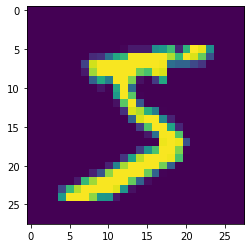

In [ ]:
import matplotlib.pyplot as plt # plt.imshow 경우에는 H, W, C
plt.imshow(train_dataset[0][0][0])

torch.Size([6, 1, 28, 28])
torch.Size([6])
